# **MLP Classifier sur  Iris : Données de classes équilibrées**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Importer les données**

In [ ]:
iris_data = pd.read_csv('iris.csv')

**Comprendre les données**

In [ ]:
print(iris_data.columns)

Index(['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm',
       'petal_width_in_cm', 'class'],
      dtype='object')


In [ ]:
iris_data.shape

(150, 5)

In [ ]:
iris_data.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.dtypes

sepal_length_in_cm    float64
sepal_width_in_cm     float64
petal_length_in_cm    float64
petal_width_in_cm     float64
class                  object
dtype: object

In [ ]:
iris_data.shape

(150, 5)

**Répartition des fleurs selon les classes**

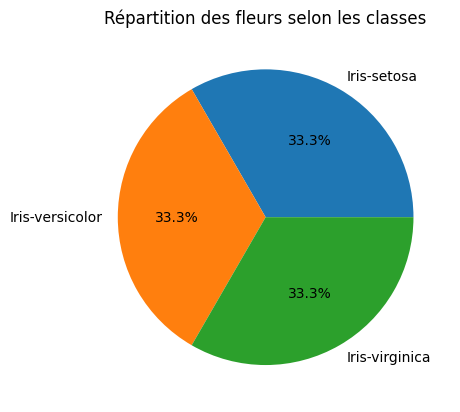

In [ ]:
class_counts = iris_data['class'].value_counts()
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Répartition des fleurs selon les classes')
plt.show()

**Corrélation entre les variables**

<ipython-input-9-cafcd8d9d82b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris_data.corr()


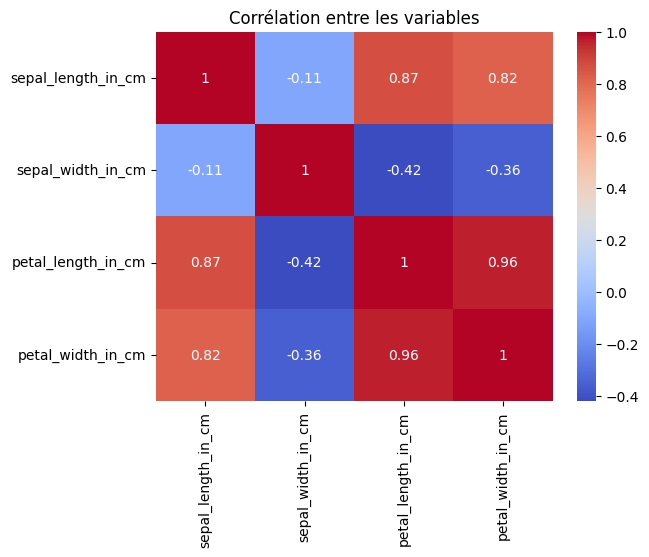

In [ ]:
corr = iris_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Corrélation entre les variables')
plt.show()

**Vérification des données manquantes**

In [ ]:
iris_data.isnull().sum()

sepal_length_in_cm    0
sepal_width_in_cm     0
petal_length_in_cm    0
petal_width_in_cm     0
class                 0
dtype: int64

**Encodage de la variable catégorielle : class**

In [ ]:
labelencoder = LabelEncoder()
iris_data['class'] = labelencoder.fit_transform(iris_data['class'])

In [ ]:
iris_data['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

**Extraction des variables expliquatives et de la variable expliquée:**
**Notre variable target c'est la colonne class,**
**Le reste sont les features**

In [ ]:
X = iris_data.drop(['class'], axis=1)
y = iris_data['class']

**Diviser les données en ensemble d'entainement et ensemble de test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Utilisation de Grid Search : Pour chercher les meilleurs hyperparamètres du modèle**

In [ ]:
grid =  {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'max_iter': [1000, 5000],
}

**Inialisation du modèle Multi Layer Perception Classificator**

In [ ]:
mlp = MLPClassifier()

In [ ]:
clf = GridSearchCV(mlp, grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
#best_params = clf.best_params_
#print(best_params)

**Entrainer le modèle les données d'entrainment**

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(10,), (50,), (100,)],
                         'max_iter': [1000, 5000], 'solver': ['adam', 'sgd']},
             verbose=2)

**Utilisation du modèle pour la prédiction**

In [ ]:
y_pred = clf.predict(X_test)

**Evaluation du modèle**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


**Visualiser la matrice de confusion**

In [ ]:
cm = confusion_matrix(y_test, y_pred)

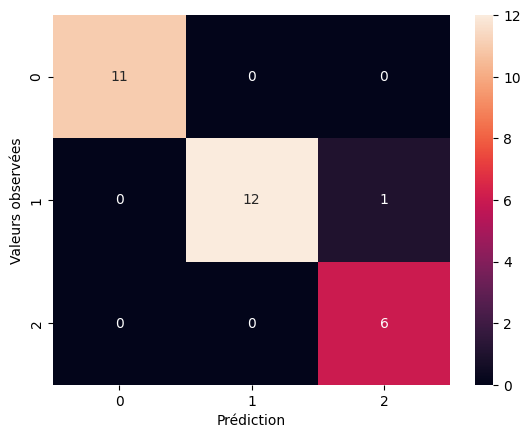

In [ ]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prédiction')
plt.ylabel('Valeurs observées')
plt.show()


**Rapport de classification**

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# **Classification avec SVC**

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy of SVC classifier:", acc_svc)

Accuracy of SVC classifier: 0.9666666666666667


# **Classification avec KNN**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN classifier:", acc_knn)

Accuracy of KNN classifier: 1.0


# **MLP Accuracy**

In [ ]:
print("Accuracy of MLP :", accuracy)

Accuracy of MLP : 0.9666666666666667
